<a href="https://colab.research.google.com/github/eubrunoread/InvestigaDados/blob/main/notebook/Calculadora_de_IMEI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solução para o cálculo de digito verificador do IMEI fornecido por operadores de telefonia por meio do sistema SITTEL**
----
*Desenvolvido pelo Agente PCSC **Bruno Bevilaqua Lemos** como parte de um projeto pessoal de aprendizagem de Phyton, sugestões ou correções podem ser enviadas para bruno-lemos@pc.sc.gov.br*

----

*Para rodar código pressione CTRL+F9, ou vá clicando no botão 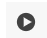 em cada célula.*

-----

O cálculo do dígito verificador do IMEI (International Mobile Equipment Identity) utiliza o algoritmo de Luhn, um método simples usado para validar uma variedade de números de identificação. Esse algoritmo é amplamente utilizado em números de cartão de crédito e IMEIs, e seu objetivo é detectar erros de digitação ou transmissão.


#### **Passos do Algoritmo de Luhn:**

Exemplo: IMEI sem o dígito verificador: 49015420323751

*Dobrar os dígitos em posições ímpares (O primeiro dígito é considerado como "posição 0")*


Posições Ímpares: 9, 1, 5, 2, 3, 3, 7
Dobrando:          9x2=18, 5x2=10, 3x2=6, 7x2=14


*Se o resultado de dobrar for maior que 9, subtraímos 9.*

Resultados ajustados: 18 -> 9, 10 -> 1, 6 -> 6, 14 -> 5

*Somar todos os números, incluindo os que não foram dobrados:*

Soma final: 9 (dígito 9) + 9 (dígito 18 ajustado) + 0 + 1 (dígito 10 ajustado) + 5 + 4 + 0 + 6 + 3 + 2 + 2 + 5 + 3 + 7 = 56


*Agora, pegamos a soma final (56) e verificamos o próximo múltiplo de 10, que é 60. Subtraímos 56 de 60 para obter o dígito verificador.*

60 - 56 = 4

Portanto, o dígito verificador é 4. Assim, o IMEI completo é 490154203237514.


###**Fluxo geral:**

1. O usuário faz upload de um arquivo CSV com uma coluna 'IMEI'.

2. O script lê e calcula o digito verificador.

3. Os IMEIS completos são salvos e baixados como TXT.

In [1]:
import pandas as pd
from google.colab import files

In [2]:
# Função para calcular o dígito verificador usando o algoritmo de Luhn
def calcular_digito_verificador(imei):
    imei = imei.replace('-', '')  # Remover hífens, se houver
    soma = 0
    for i, digito in enumerate(imei):
        digito = int(digito)
        if i % 2 == 1:  # Dobrar os dígitos nas posições ímpares
            digito *= 2
            if digito > 9:  # Se o resultado for maior que 9, subtrair 9
                digito -= 9
        soma += digito
    digito_verificador = (10 - (soma % 10)) % 10
    return digito_verificador

#**Upload do arquivo com IMEIs**
Aqui você deve selecionar o arquivo CSV, contendo a lista de IMEIs

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Upload do arquivo "{name}" com o tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:

# Ler os dados
df = pd.read_csv(list(uploaded.keys())[0])
df

In [ ]:
# Lista para armazenar os IMEIs completos
imeis_completos = []

# Para cada IMEI, calcular o dígito verificador e adicionar à lista
for imei in df['IMEI']:
    imei_str = imei.replace('-', '')[:-1]  # Remove os hífens e exclui o último dígito
    digito_verificador = calcular_digito_verificador(imei_str)
    imei_completo = imei_str + str(digito_verificador)
    imeis_completos.append(imei_completo)


In [ ]:
print("IMEIs completos com dígito verificador:")
for imei in imeis_completos:
    print(imei)

In [ ]:

# Salvando os IMEIs completos em um arquivo de texto
with open('imeis_completos.txt', 'w') as f:
    for imei in imeis_completos:
        f.write(imei + '\n')

## **Download do Arquivo**

In [ ]:
# Fazer download do arquivo de texto
files.download('imeis_completos.txt')